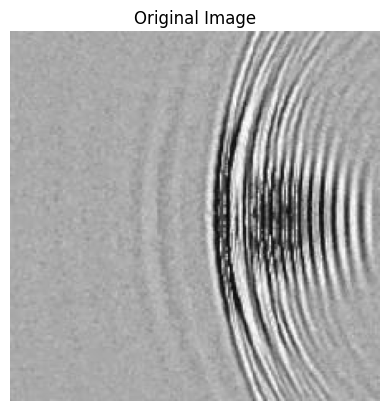

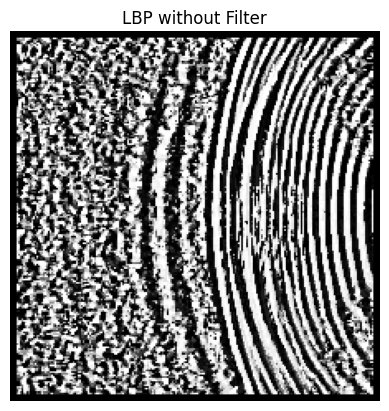

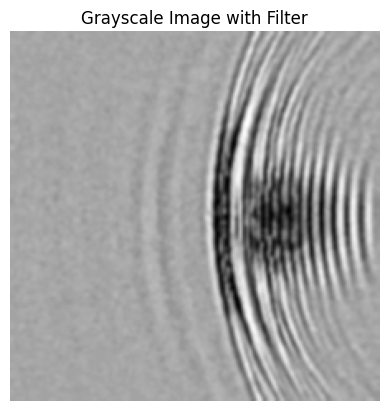

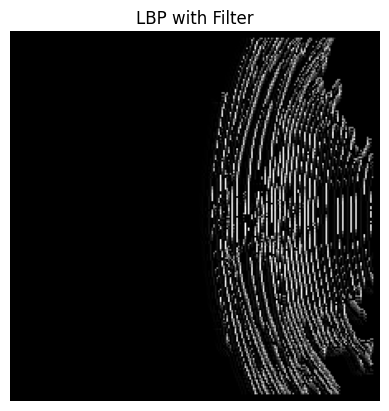

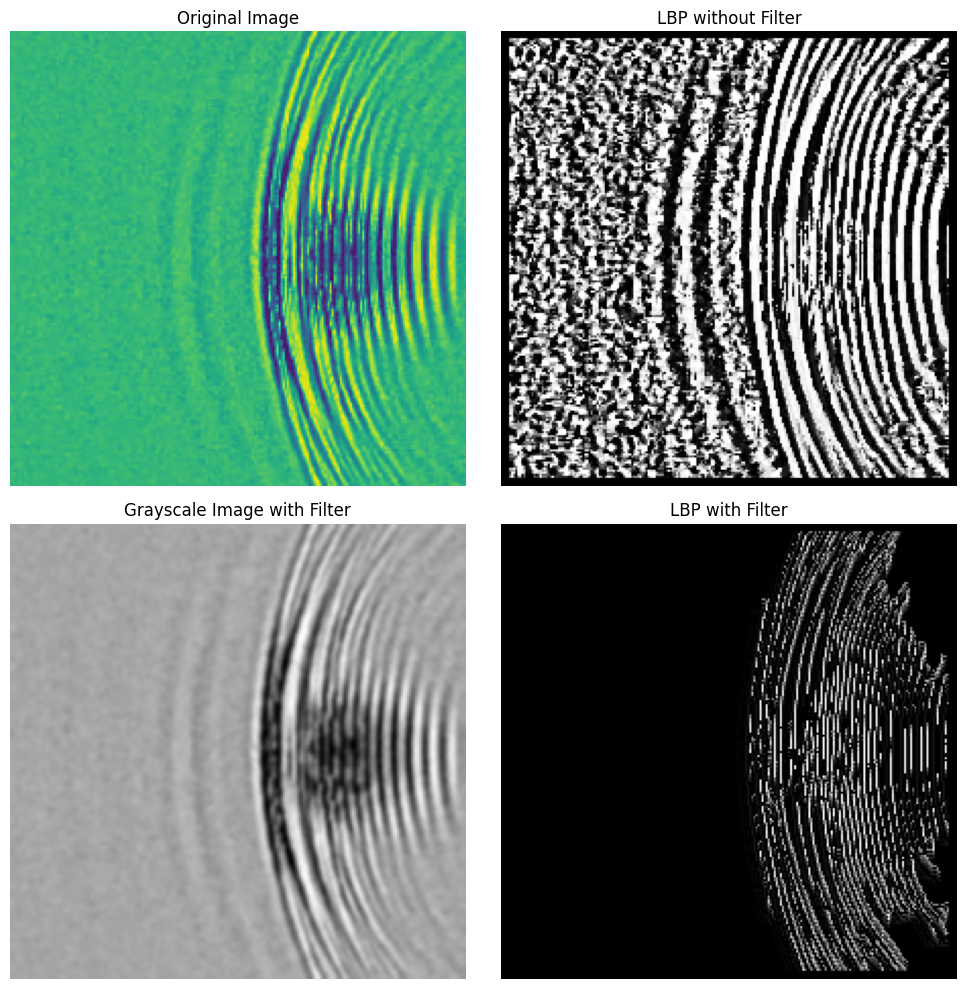

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define radius and number of neighboring points
R = 4
P = 12

# Function to display an image with a given title
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the grayscale image
trained_image_path = 'img_00067.jpg'
trained_image = cv2.imread(trained_image_path, cv2.IMREAD_GRAYSCALE)

# Function to calculate LBP image
def calculate_lbp_image(image):
    lbp_image = np.zeros_like(image)
    height, width = image.shape
    lbp_codes = np.zeros((height, width), dtype=np.uint8)

    for y in range(R, height - R):
        for x in range(R, width - R):
            center = image[y, x]
            lbp_code = 0
            for i in range(P):
                theta = 2 * np.pi * i / P
                x_i = int(x + R * np.cos(theta))
                y_i = int(y - R * np.sin(theta))
                neighbor = image[y_i, x_i]
                lbp_code |= (neighbor > center) << i
            lbp_image[y, x] = lbp_code
            lbp_codes[y, x] = lbp_code
    
    return lbp_image, lbp_codes

# Display original image
display_image(trained_image, 'Original Image')

# Calculate LBP image without filter
lbp_image, lbp_codes = calculate_lbp_image(trained_image)

# Display LBP image without filter
display_image(lbp_image, 'LBP without Filter')

# Apply blur filter
blurred_image = cv2.GaussianBlur(trained_image, (5, 5), 0)

# Display grayscale image with filter
display_image(blurred_image, 'Grayscale Image with Filter')

# Apply Canny edge detection
canny_image = cv2.Canny(blurred_image, 30, 150)

# Calculate LBP image with filter
lbp_image_with_filter, lbp_codes_with_filter = calculate_lbp_image(canny_image)

# Display LBP image with filter
display_image(lbp_image_with_filter, 'LBP with Filter')

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(trained_image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(lbp_image, cmap='gray')
axes[0, 1].set_title('LBP without Filter')
axes[0, 1].axis('off')

axes[1, 0].imshow(blurred_image, cmap='gray')
axes[1, 0].set_title('Grayscale Image with Filter')
axes[1, 0].axis('off')

axes[1, 1].imshow(lbp_image_with_filter, cmap='gray')
axes[1, 1].set_title('LBP with Filter')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()
